In [53]:
from IPython.core.pylabtools import figsize
# some imports

from IPython.display import display, HTML
from tensorboard.compat.tensorflow_stub.dtypes import int16

display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
 
# Scikit-Learn ≥0.20 is required
import sklearn as sk
assert sk.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# create output folder
if not os.path.exists('output'):
    os.makedirs('output')
if not os.path.exists('output/session1'):
    os.makedirs('output/session1')

In [54]:
df = pd.read_csv('../dataset/housing-snapshot/train_set.csv',index_col=0) 

In [55]:
dropped_columns = ['Address', 'SellerG', 'CouncilArea', 'Regionname', 'Postcode', 'YearBuilt', 'BuildingArea']

df = df.drop(dropped_columns, axis=1)

# Remove the 0s
df = df[df['Bedroom2'] > 0]
df = df[df['Bathroom'] > 0]
df = df[df['Price'] > 0]
df = df[df['Rooms'] > 0]

# Remove large landsizes
df = df[df['Landsize'] < 10000]


price = df['Price']  

In [56]:
df.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
index,,,,,,,,,,,,,,
0,Aberfeldie,4,h,1380000.0,VB,12/08/2017,7.5,4.0,2.0,2.0,766.0,-37.75595,144.90551,1543.0
1,Northcote,2,h,1100000.0,SP,20/05/2017,5.5,2.0,1.0,1.0,189.0,-37.77670,144.99240,11364.0
2,Balwyn North,3,h,1480000.0,PI,15/10/2016,9.2,3.0,1.0,4.0,605.0,-37.79510,145.06960,7809.0
3,Brunswick,3,h,1055000.0,S,7/05/2016,5.2,3.0,1.0,1.0,324.0,-37.76530,144.95860,11918.0
4,Templestowe Lower,4,h,1000000.0,VB,13/08/2016,13.8,4.0,3.0,2.0,728.0,-37.76800,145.10270,5420.0


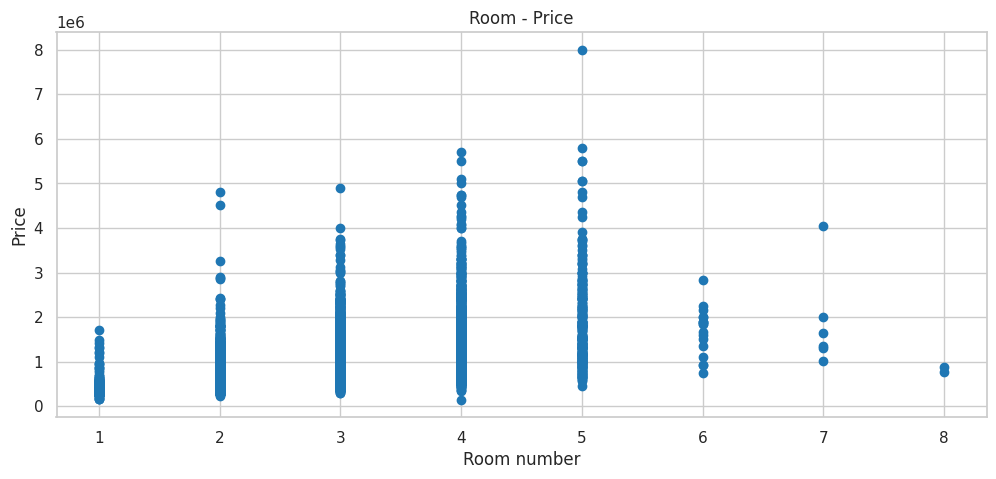

In [57]:
# room - price
plt.scatter(df['Rooms'], price)
plt.ylabel('Price')
plt.xlabel('Room number')
plt.title('Room - Price')
plt.show()

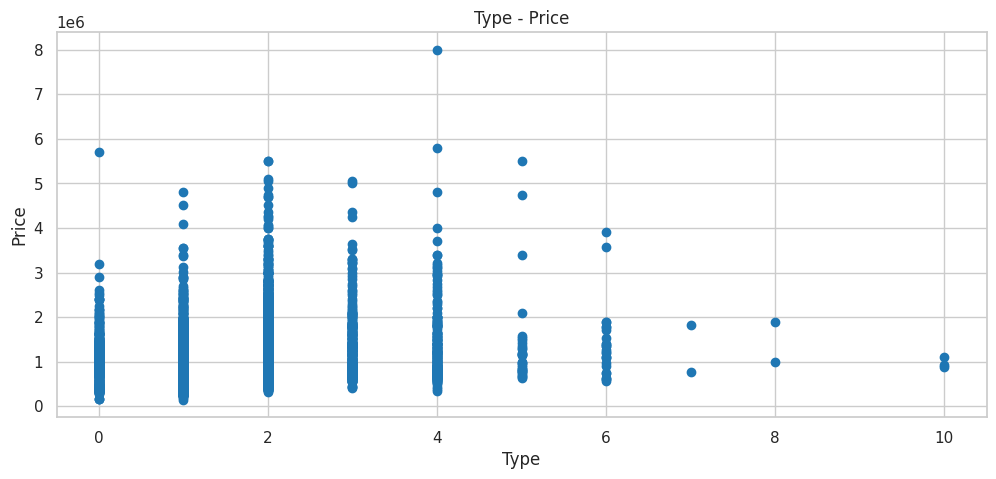

In [58]:
# room - price
plt.scatter(df['Car'], price)
plt.ylabel('Price')
plt.xlabel('Type')
plt.title('Type - Price')
plt.show()

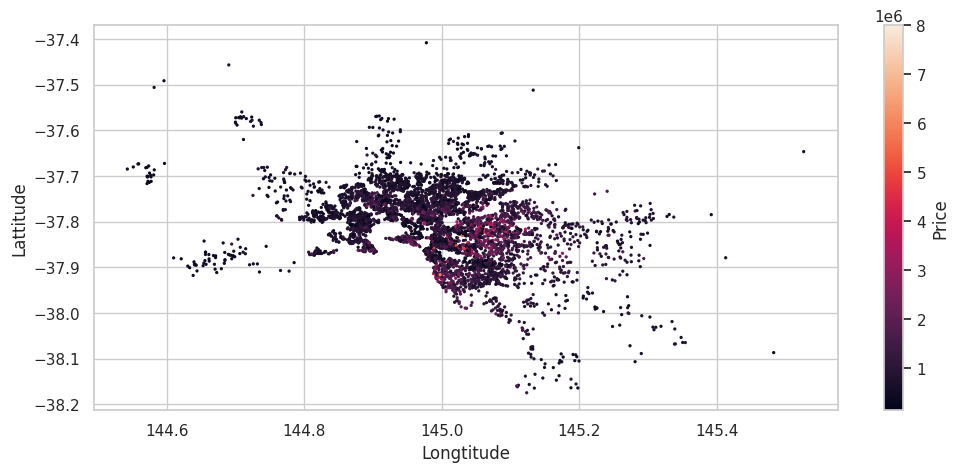

In [59]:
df.plot(kind="scatter", x="Longtitude", y="Lattitude", s=1.8, c='Price')
plt.show()

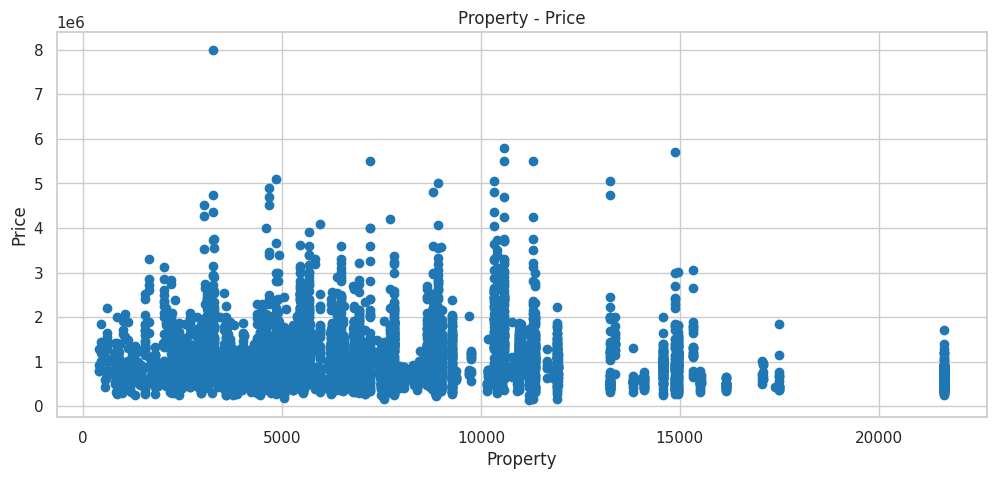

In [60]:
# room - price
plt.scatter(df['Propertycount'], price)
plt.ylabel('Price')
plt.xlabel('Property')
plt.title('Property - Price')
plt.show()

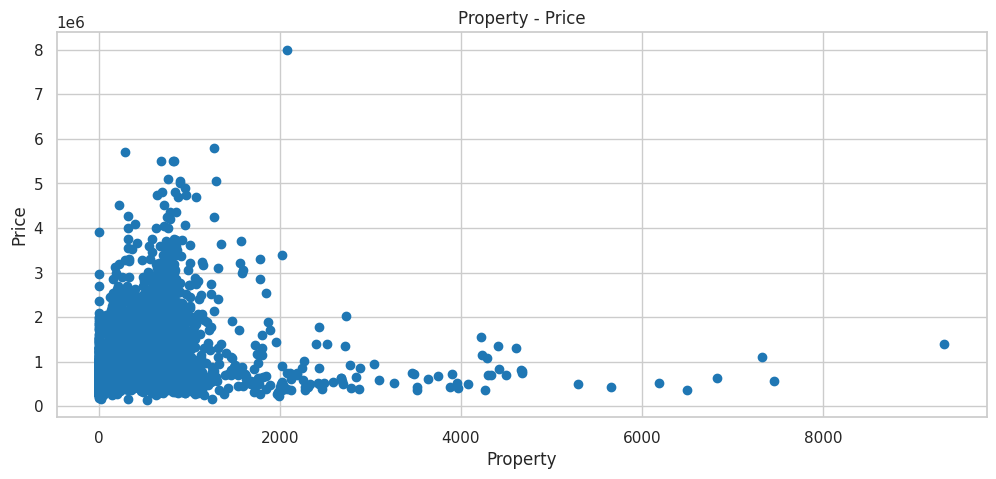

In [61]:
# room - price
plt.scatter(df['Landsize'], price)
plt.ylabel('Price')
plt.xlabel('Property')
plt.title('Property - Price')
plt.show()